[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

In [2]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.6 MB/s 
     |████████████████████████████████| 453 kB 57.2 MB/s 


In [ ]:
! pip install wordcloud

In [1]:
from google import colab
colab.drive.mount("/content/drive")

Mounted at /content/drive


In [17]:
import pandas as pd
import numpy as np
from konlpy.tag import Okt
from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# import seaborn as sns
# import urllib.request
from collections import Counter
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 

The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155632 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [6]:
data = "/content/drive/MyDrive/BOAZ/감정분석_프로젝트/Data/"
train = pd.read_csv(f'{data}train.csv')
test = pd.read_csv(f'{data}test.csv')

In [7]:
train.head()

,ratings,reviews,label
0,2,사이즈를 센치씩 늘린건데도 작아요 그리고 색상은 완전 달라요 칙칙한핑크네요ㅠㅠ 많이...,0
1,2,ㅂ불만족 빗이 아픔 멍이피부에 빗질못해주겟네요,0
2,1,이 제품쓰고 삼일만에 변기물이 잘 안내려갔어요 혹시나해서 다시 빼보니 물이 다시 잘...,0
3,5,적당하고 만족합니다,1
4,2,편하자고 이용하는 밀키튼데 손 은근 많이 가서 저는 패쓰요,0


In [8]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [10]:
okt = Okt()

In [11]:
stopwords = ['요', '도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [12]:
train['tokenized'] = train['reviews'].apply(okt.morphs)
train['tokenized'] = train['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [13]:
test['tokenized'] = test['reviews'].apply(okt.morphs)
test['tokenized'] = test['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [14]:
negative_words = np.hstack(train[train.label == 0]['tokenized'].values)
positive_words = np.hstack(train[train.label == 1]['tokenized'].values)

In [15]:
nw = Counter(negative_words)
print(nw.most_common(20))

[('너무', 13039), ('안', 11676), ('배송', 9171), ('그냥', 8518), ('잘', 7817), ('로', 5777), ('했는데', 5692), ('별로', 5549), ('못', 5174), ('제품', 5071), ('으로', 4999), ('생각', 4927), ('좀', 4878), ('사용', 4846), ('하고', 4769), ('ㅠㅠ', 4760), ('구매', 4634), ('보다', 4617), ('맛', 4017), ('만', 3961)]


In [19]:
nwc = nw.most_common(15)

{'너무': 13039, '안': 11676, '배송': 9171, '그냥': 8518, '잘': 7817, '로': 5777, '했는데': 5692, '별로': 5549, '못': 5174, '제품': 5071, '으로': 4999, '생각': 4927, '좀': 4878, '사용': 4846, '하고': 4769}


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


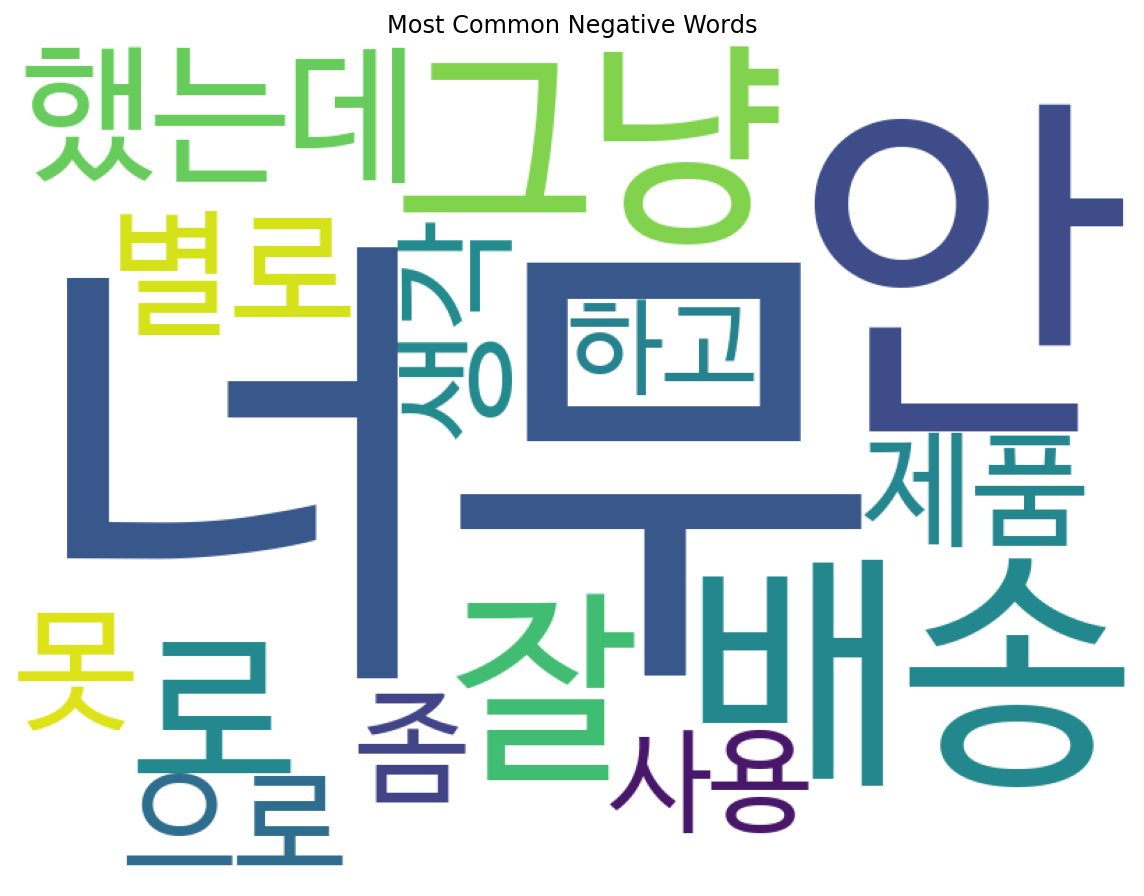

In [20]:
#wordCloud생성
#한글꺠지는 문제 해결하기위해 font_path 지정
negative_word_cloud = WordCloud(font_path=fontpath, 
               background_color='white', width=800, height=600)
print(dict(nwc))
cloud = negative_word_cloud.generate_from_frequencies(dict(nwc))
plt.figure(figsize=(10, 8))
plt.title('Most Common Negative Words')
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [21]:
pw = Counter(positive_words)
print(pw.most_common(20))

[('잘', 15302), ('좋아요', 14527), ('배송', 12251), ('너무', 9100), ('재구매', 8573), ('구매', 7186), ('사용', 5415), ('가격', 5015), ('으로', 4477), ('같아요', 4434), ('로', 4318), ('좋네요', 4221), ('빠르고', 4025), ('보다', 3955), ('제품', 3950), ('주문', 3815), ('입니다', 3769), ('생각', 3491), ('했어요', 3367), ('더', 3276)]


In [22]:
pwc = pw.most_common(15)

{'잘': 15302, '좋아요': 14527, '배송': 12251, '너무': 9100, '재구매': 8573, '구매': 7186, '사용': 5415, '가격': 5015, '으로': 4477, '같아요': 4434, '로': 4318, '좋네요': 4221, '빠르고': 4025, '보다': 3955, '제품': 3950}


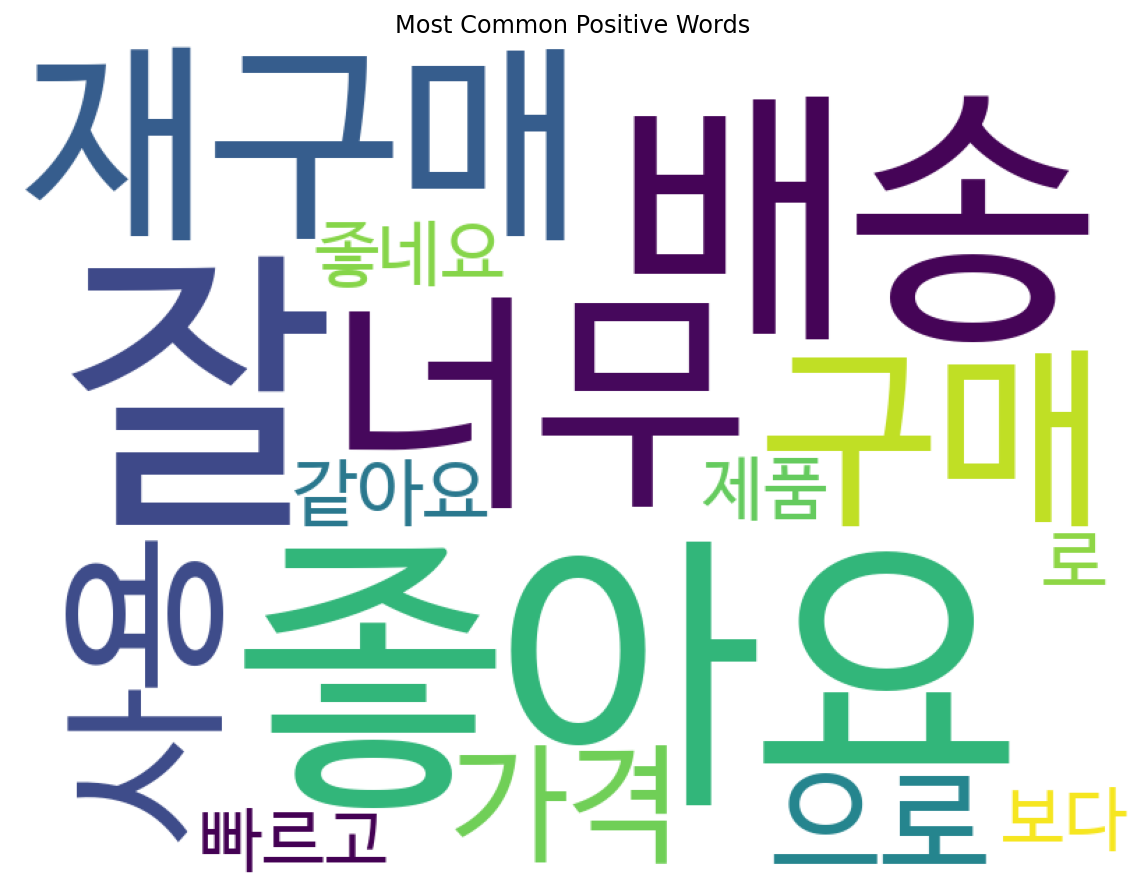

In [23]:
positive_word_cloud = WordCloud(font_path=fontpath, 
               background_color='white', width=800, height=600)
print(dict(pwc))
cloud = positive_word_cloud.generate_from_frequencies(dict(pwc))
plt.figure(figsize=(10, 8))
plt.title('Most Common Positive Words')
plt.axis('off')
plt.imshow(cloud)
plt.show()